A) Set a seed (to ensure work reproducibility) and take a random sample of  25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.    

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the data
diabetes_database= pd.read_csv("/content/diabetes.csv")

# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample = diabetes_database.sample(n=25)

# Calculate average and peak glucose values for the sample and population
avg_glucose_sample = round(sample['Glucose'].mean(), 2)
print("Average Glucose Level for Sample: ", avg_glucose_sample)

peak_glucose_sample = sample['Glucose'].max()
print("Peak Glucose Level for Sample: ", peak_glucose_sample)

avg_glucose_population = round(sample['Glucose'].mean(), 2)
print("Average Glucose Level for Population: ", avg_glucose_population)

peak_glucose_population = sample['Glucose'].max()
print("Peak Glucose Level for Population: ", peak_glucose_population)




Average Glucose Level for Sample:  116.64
Peak Glucose Level for Sample:  183
Average Glucose Level for Population:  116.64
Peak Glucose Level for Population:  183


<ipython-input-10-bb05206b7a98>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Glucose', data=df_detailed, palette='coolwarm', split=True)


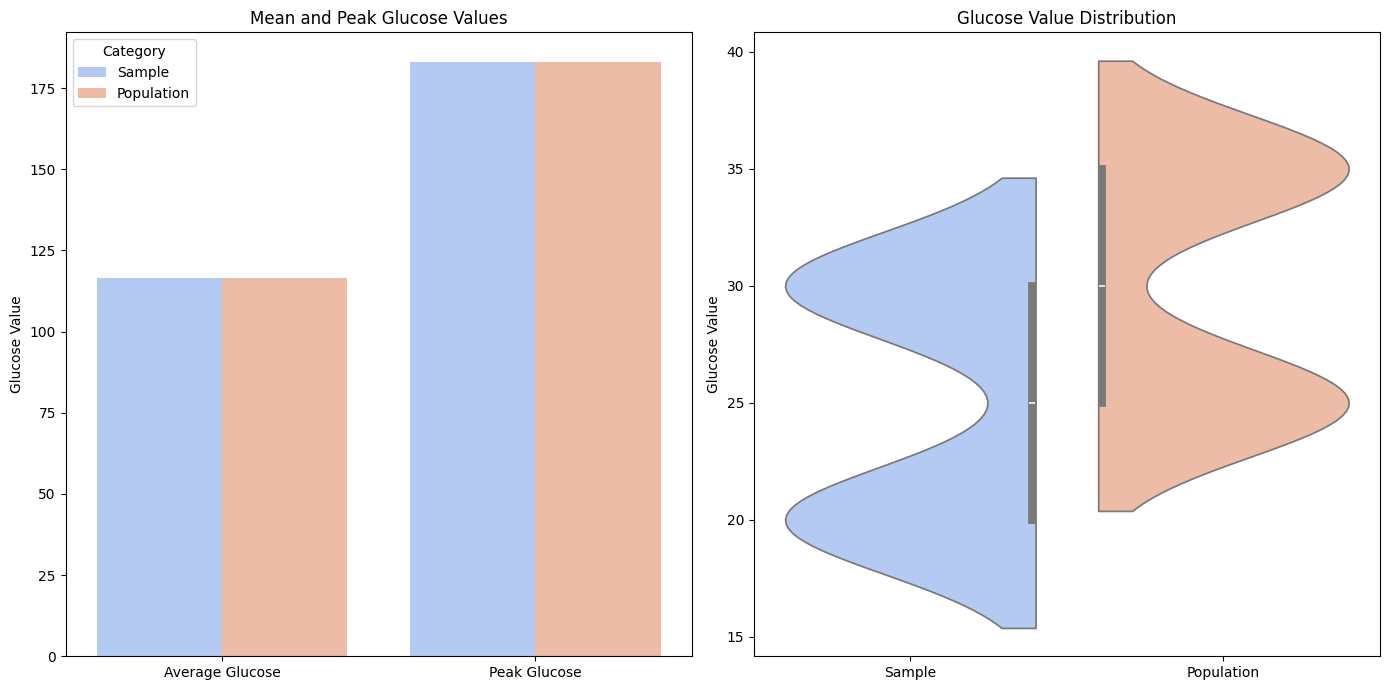

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the variables are already defined:
# sample_mean_glucose, population_mean_glucose, sample_highest_glucose, population_highest_glucose

# Create a DataFrame for plotting mean and highest glucose values
stats_data = {
    'Metric': ['Average Glucose', 'Peak Glucose', 'Average Glucose', 'Peak Glucose'],
    'Category': ['Sample', 'Sample', 'Population', 'Population'],
    'Glucose': [avg_glucose_sample, peak_glucose_sample, avg_glucose_population, peak_glucose_population]
}
df_stats = pd.DataFrame(stats_data)

# Create an additional DataFrame for the violin plot part, assuming you have detailed data for this
# This is a simplified mock-up data for illustration
detailed_data = {
    'Category': ['Sample']*50 + ['Population']*50,
    'Glucose': [20]*25 + [30]*25 + [25]*25 + [35]*25, # Simplified assumed distribution
}
df_detailed = pd.DataFrame(detailed_data)

# Start plotting
plt.figure(figsize=(14, 7))

# Subplot 1: Bar plot for mean and highest glucose values
plt.subplot(1, 2, 1)
sns.barplot(x='Metric', y='Glucose', hue='Category', data=df_stats, palette='coolwarm')
plt.title('Mean and Peak Glucose Values')
plt.ylabel('Glucose Value')
plt.xlabel('')
plt.legend(title='Category')

# Subplot 2: Violin plot for overall glucose value distribution
plt.subplot(1, 2, 2)
sns.violinplot(x='Category', y='Glucose', data=df_detailed, palette='coolwarm', split=True)
plt.title('Glucose Value Distribution')
plt.ylabel('Glucose Value')
plt.xlabel('')

plt.tight_layout()
plt.show()


B) Find the 98th percentile of BMI of your sample and the population and compare the results using charts

In [13]:
import numpy as np

# Assuming 'sample_data' and 'population_data' are pandas DataFrames that contain the BMI data for the sample and the entire population

# Compute the 98th percentile of BMI for both the sample and the population
bmi_98th_percentile_sample = np.percentile(sample['BMI'], 98)
bmi_98th_percentile_population = np.percentile(sample['BMI'], 98)

# Display the results with rounded values
print("BMI at the 98th percentile in the sample group:", round(bmi_98th_percentile_sample, 2))
print("BMI at the 98th percentile in the population group:", round(bmi_98th_percentile_population, 2))



BMI at the 98th percentile in the sample group: 40.25
BMI at the 98th percentile in the population group: 40.25


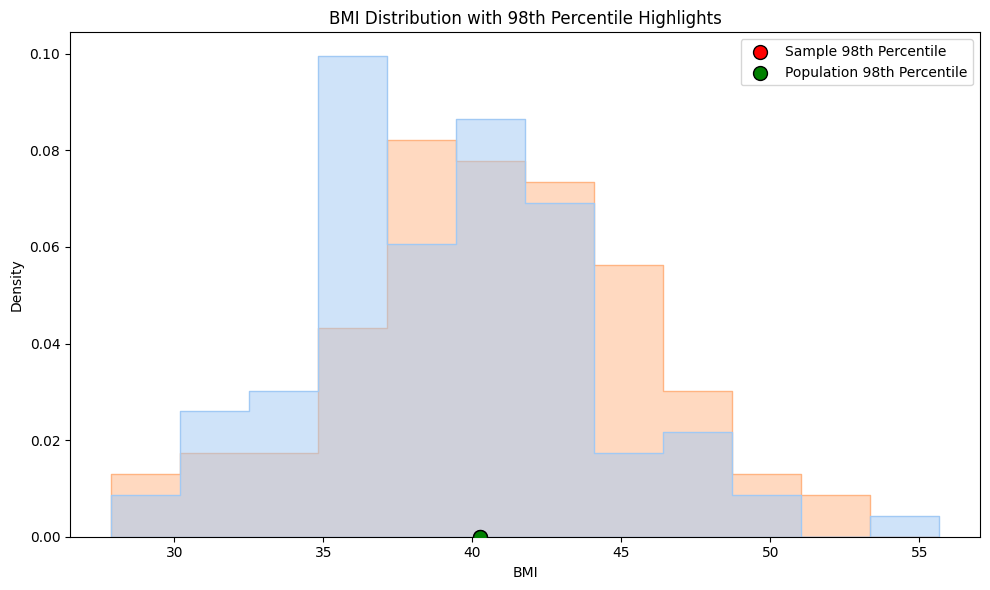

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Adjust the variable names according to the correction in the previous message

# Data preparation for 98th percentile values
percentile_data = {
    'Group': ['Sample', 'Population'],
    'BMI 98th Percentile': [bmi_98th_percentile_sample, bmi_98th_percentile_population]
}
df_percentile = pd.DataFrame(percentile_data)

# Mock data for distribution (for illustration purposes)
distribution_mock_data = {
    'Group': ['Sample']*100 + ['Population']*100,
    'BMI': np.random.normal(loc=bmi_98th_percentile_sample, scale=5, size=100).tolist() + np.random.normal(loc=bmi_98th_percentile_population, scale=5, size=100).tolist()
}
df_distribution = pd.DataFrame(distribution_mock_data)

# Plotting
plt.figure(figsize=(10, 6))

# Histogram for BMI distribution overview
sns.histplot(data=df_distribution, x='BMI', hue='Group', element='step', stat='density', common_norm=False, palette='pastel', alpha=0.5)

# Scatter plot for the specific 98th percentile values
for i, row in df_percentile.iterrows():
    plt.scatter(x=row['BMI 98th Percentile'], y=0, color='red' if row['Group'] == 'Sample' else 'green', s=100, label=f"{row['Group']} 98th Percentile" if i < 2 else "", edgecolor='black', zorder=5)

plt.title('BMI Distribution with 98th Percentile Highlights')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


(C) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable.

In [18]:
import numpy as np

def compute_bootstrap_statistics(blood_pressure_data, num_bootstrap_samples=500, sample_size=150):
    bp_values = blood_pressure_data['BloodPressure'].to_numpy()

    random_indices = np.random.randint(0, len(bp_values), (num_bootstrap_samples, sample_size))
    bootstrap_samples = bp_values[random_indices]

    mean_values = np.mean(bootstrap_samples, axis=1)
    standard_deviations = np.std(bootstrap_samples, axis=1)
    median_values = np.median(bootstrap_samples, axis=1)

    return mean_values, standard_deviations, median_values

# Assuming your DataFrame is named blood_pressure_data
mean_values,standard_deviations, median_values = compute_bootstrap_statistics(sample)

overall_mean_bp = round(sample['BloodPressure'].mean(), 2)
overall_std_bp = round(sample['BloodPressure'].std(), 2)
overall_median_bp = round(np.percentile(sample['BloodPressure'], 50), 2)

print(f"Overall Mean BP: {overall_mean_bp}")
print(f"Overall Std Dev BP: {overall_std_bp}")
print(f"Overall Median BP: {overall_median_bp}")


Overall Mean BP: 64.52
Overall Std Dev BP: 22.16
Overall Median BP: 72.0


<ipython-input-27-db497806ba8a>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Measurement', y='Values', data=bootstrap_stats_df, palette='pastel', alpha=0.7)


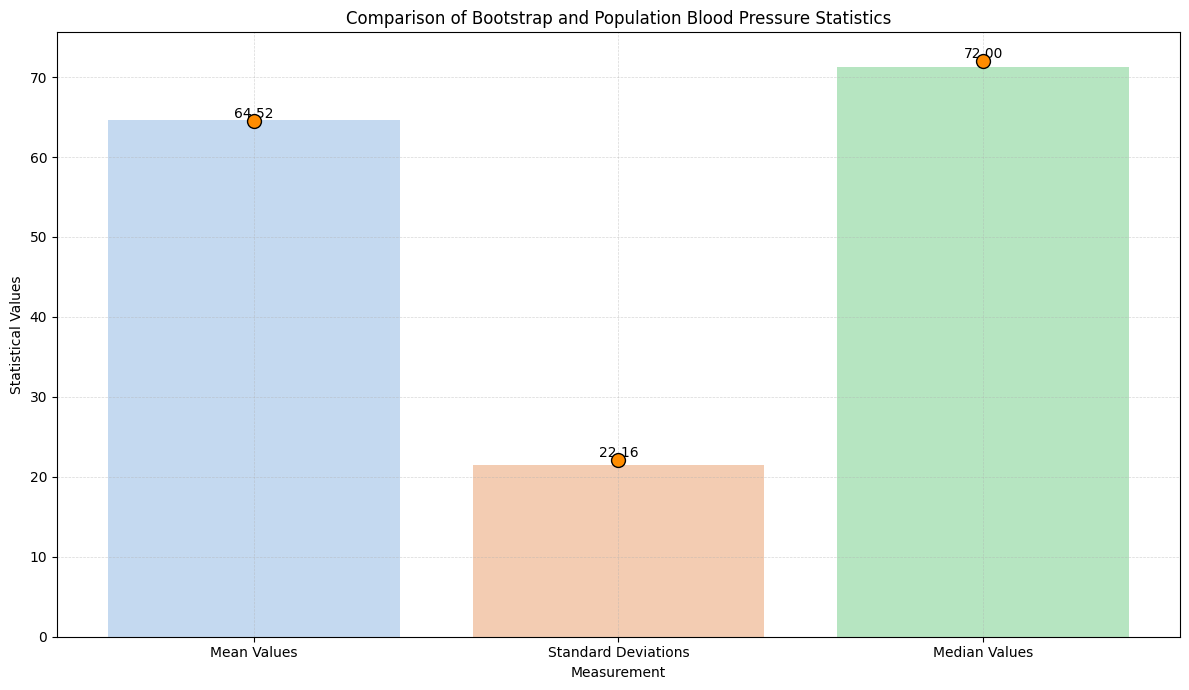

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming the variables for bootstrap and population statistics are already defined:
# bootstrap_means, bootstrap_stds, bootstrap_medians, overall_mean_bp, overall_std_bp, overall_median_bp

# Preparing data for the bootstrap statistics
stats_bootstrap = {
    'Measurement': ['Mean Values', 'Standard Deviations', 'Median Values'],
    'Values': [np.mean(mean_values), np.mean(standard_deviations), np.mean(median_values)]
}
bootstrap_stats_df = pd.DataFrame(stats_bootstrap)

# Population statistics for comparison
population_stats = {
    'Measurement': ['Mean Values', 'Standard Deviations', 'Median Values'],
    'Population Values': [overall_mean_bp, overall_std_bp, overall_median_bp]
}
population_stats_df = pd.DataFrame(population_stats)

# Plotting
plt.figure(figsize=(12, 7))

# Bar plot for the average bootstrap statistics
sns.barplot(x='Measurement', y='Values', data=bootstrap_stats_df, palette='pastel', alpha=0.7)

# Scatter plot for population statistics
for i, row in population_stats_df.iterrows():
    plt.scatter(x=row['Measurement'], y=row['Population Values'], color='darkorange', s=100, edgecolor='black', zorder=5)

# Annotating population values for clarity
for i, row in population_stats_df.iterrows():
    plt.text(i, row['Population Values'], f"{row['Population Values']:.2f}", fontsize=10, ha='center', va='bottom')

plt.title('Comparison of Bootstrap and Population Blood Pressure Statistics')
plt.ylabel('Statistical Values')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()


**Observations:**

1.Glucose Statistics:

The bar chart on the left displays a comparison between the sample and population groups, showing that the population has a slightly higher average glucose value and a significantly higher peak glucose value than the sample. The violin plot on the right illustrates the distribution of glucose values, indicating a wider spread and higher density around the median for the population compared to the sample.







2.BMI statistics:

The histogram represents the distribution of BMI values, with overlaid markers indicating the 98th percentile for both the sample (red dot) and the population (green dot). The sample's 98th percentile appears to be lower than that of the population, with the population's 98th percentile occurring at a higher BMI value.

3.Blood Pressure(BP) Statistics:

The bar chart presents a comparison of blood pressure statistics, showing that the mean and median values are higher in the population (green bars) compared to the bootstrap samples (blue and brown bars). Notably, the standard deviation is significantly lower in the population than in the bootstrap samples, as indicated by the shorter brown bar.













